In [1]:
using JLD, PyPlot

In [2]:
nomis="../JLDFiles/TrabajandoKyKTilde/LFP_Promedio_est_con5.jld"

"../JLDFiles/TrabajandoKyKTilde/LFP_Promedio_est_con5.jld"

In [3]:
datos=load(nomis)

Dict{String,Any} with 12 entries:
  "KTT_KInv"         => [0.710605 0.155257 … -5.54059e-5 -2.93594e-5; 0.168929 …
  "latencia"         => 27
  "kCSDCorrecta"     => [0.0 2.02285 … -0.0720208 -0.394232; 1.17 2.77874 … -0.…
  "final"            => 1072
  "KTilde"           => [28.1263 33.76 … 1.19496 0.892065; 27.0489 36.982 … 1.2…
  "Canalesrespuesta" => Set(Array{Int64,1}[[33, 57], [25, 39], [33, 56], [30, 4…
  "retrazo"          => 90
  "freq"             => 17.8555
  "LFPSaturados"     => [4125.0 7.38525 … 20.813 6.71387; 22.1558 18.7988 … 11.…
  "Nota"             => "Usamos las siguientes B y BT para obtener las Ks: Bcer…
  "K"                => [7521.15 3890.8 … 1624.32 1592.52; 3890.8 8100.04 … 165…
  "CanalesSaturados" => Set(Array{Int64,1}[[11, 63], [41, 46], [6, 37], [44, 23…

In [11]:
lfp=datos["LFPSaturados"];
saturados=datos["CanalesSaturados"]
respuestas=datos["Canalesrespuesta"];
retrazo=datos["retrazo"]
frecuencia=datos["freq"]

tantossaturados=length(saturados)
tantosrespuesta=length(respuestas);

In [12]:
texg=136
latencia=round(Int, ceil(1.5*frecuencia))
iniciobusqueda=retrazo
finbusqueda=retrazo+10*latencia

360

In [14]:
ejemplo=lfp[:,:,texg];

xxsresp=zeros(tantosrespuesta)
yysresp=zeros(tantosrespuesta)
j=1
for q in respuestas
    xxsresp[j]=q[2]
    yysresp[j]=q[1]
    j+=1
end
xxssatu=zeros(tantossaturados)
yyssatu=zeros(tantossaturados)
j=1
for q in saturados
    xxssatu[j]=q[2]
    yyssatu[j]=q[1]
    j+=1
end

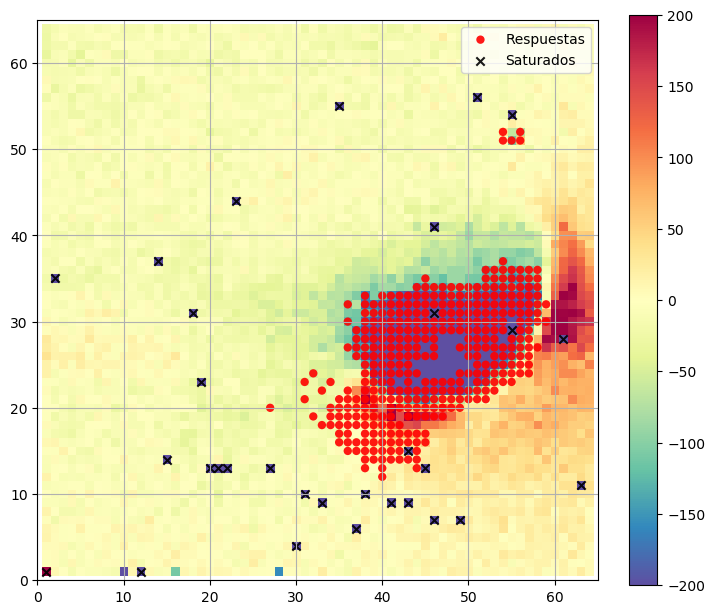

In [18]:
figura=figure(figsize=(8,8))
xlim(0,65)
ylim(0,65)
grid()
limites=200
imagen=imshow(ejemplo, origin="lower", interpolation="nearest", cmap="Spectral_r", 
vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])
cb=colorbar(imagen, fraction=0.046)
scatter(xxsresp,yysresp, alpha=0.9, c="red", edgecolor="none", label="Respuestas")   
scatter(xxssatu,yyssatu, alpha=0.9, c="black", edgecolor="none", marker="x", label="Saturados") 
legend()
savefig("MapaSaturados.png",dpi=90)

In [49]:
lfpplano=zeros(tantosrespuesta,101)
intervalo=retrazo:retrazo+100

k=1
for j in respuestas
    lfpplano[k,:]=vec(lfp[j[1],j[2],intervalo])
    k+=1
end

In [50]:
### Primero los centramos

lfpmasajeado=zeros(lfpplano)
promedios=zeros(tantosrespuesta)
mean!(promedios,lfpplano)
for j=1:tantosrespuesta
    lfpmasajeado[j,:]=lfpplano[j,:]-promedios[j]
end


In [62]:
correlaciones=zeros(tantosrespuesta,tantosrespuesta)
vcdot(x,y) = dot(vec(x), vec(y))
vcdotnorm(x,y)=vcdot(x,y)/dot(abs.(vec(x)),abs.(vec(y)))

vcdotnorm (generic function with 1 method)

In [63]:
@time for j=1:tantosrespuesta,k=1:tantosrespuesta
    if(mod(j,64)==64); println("llevamos", j); end
    correlaciones[k,j]=vcdotnorm(lfpplano[k,:], lfpplano[j,:])
end
    
#correlaciones/=tmax
#writedlm( "test.dat" ,correlaciones)



  2.825802 seconds (7.48 M allocations: 713.886 MiB, 3.80% gc time)


101-element Array{Float64,1}:
    14.7705  
 -2250.49    
 -4122.99    
 -2639.22    
  -503.54    
  -519.653   
  -416.931   
  -321.594   
  -281.982   
  -249.084   
  -230.957   
  -192.688   
  -154.419   
     ⋮       
    -7.38525 
     3.35693 
    16.7847  
    12.7563  
    -7.38525 
     0.0     
     9.39941 
    -0.671387
    17.4561  
    18.7988  
    14.7705  
     0.0     

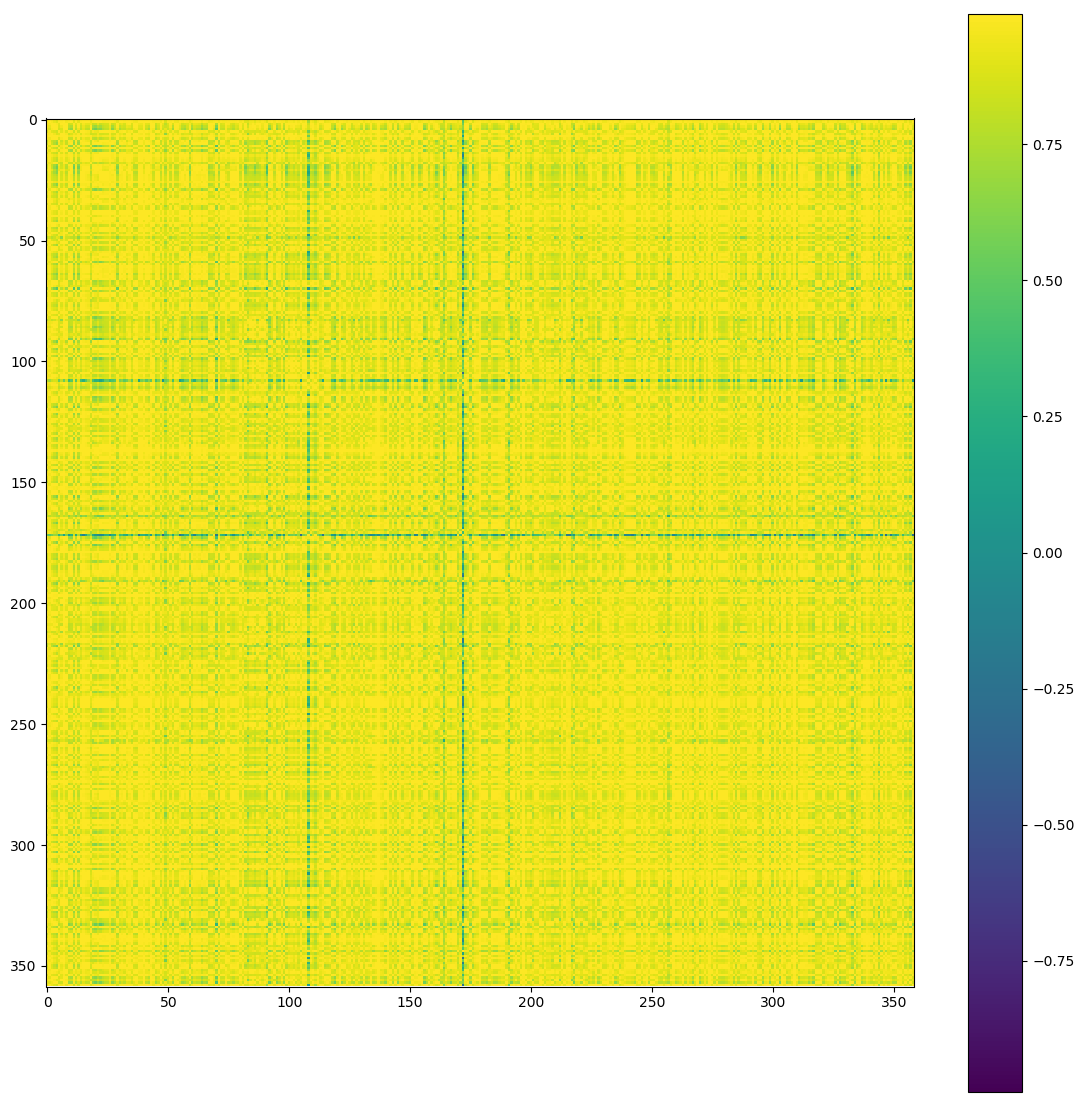

PyObject <matplotlib.colorbar.Colorbar object at 0x7f959afd7f28>

In [67]:
figurera=figure(figsize=(14,14))
vm=0.99
imshow(correlaciones, cmap="viridis",vmin=-vm,vmax=vm)
cb=colorbar()
#savefig("tuabuela.png",dpi=90)

In [64]:
extrema(correlaciones)

(-0.3022714746028919, 1.0)

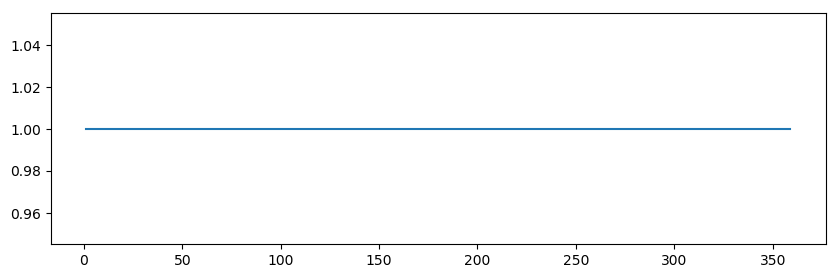

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f959b137160>

In [65]:
figure(figsize=(10,3))
plot(1:tantosrespuesta, diag(correlaciones))

In [70]:
using MultivariateStats

In [71]:
mica=MultivariateStats.ICA

MultivariateStats.ICA

In [73]:
tuabuela=fit(mica, lfpmasajeado,100,mean=0)

MultivariateStats.ICA(Float64[], [0.00306672 0.00250707 … -0.00151735 -0.0023009; -2.93681e-5 0.00418902 … -0.00384103 -0.00297835; … ; 0.00252066 -0.000982204 … -0.00240624 -0.000121499; 0.00057882 -0.00379314 … 0.000682303 0.00219931])

In [74]:
heytu=transform(tuabuela,lfpmasajeado)

100×101 Array{Float64,2}:
  0.239139    0.368731   -0.347165   …   0.214469    -0.0613399   0.153838 
  0.591403    0.671789    0.726562       0.471191    -0.326339    0.199478 
 -2.562       0.720266    0.281238      -0.268834     0.312942    1.90253  
 -0.329328   -0.240485   -1.03691        0.719481     0.483929   -0.239955 
  0.449215    0.306964    0.472732       0.338463     0.35862    -0.281334 
 -0.317278    0.0139928   0.568803   …   0.163786     0.575639   -0.261231 
 -2.21899    -0.0711233  -0.569373      -1.84672     -0.715697    2.16026  
  0.369604   -0.328698   -0.208739      -0.560602     5.72392    -0.143355 
 -0.980809    0.100063   -0.121404      -0.0345177   -0.303999    1.10762  
 -0.146039   -0.950145   -1.09751        0.476836     0.956714    0.20155  
  0.270348    1.11728    -0.308112   …  -0.0912587    0.450281    0.0115593
 -0.108907    0.3482      0.167836       0.0244077   -0.202311   -0.0297425
  0.0774174  -0.0431231  -0.630723      -0.225444     4.57111 

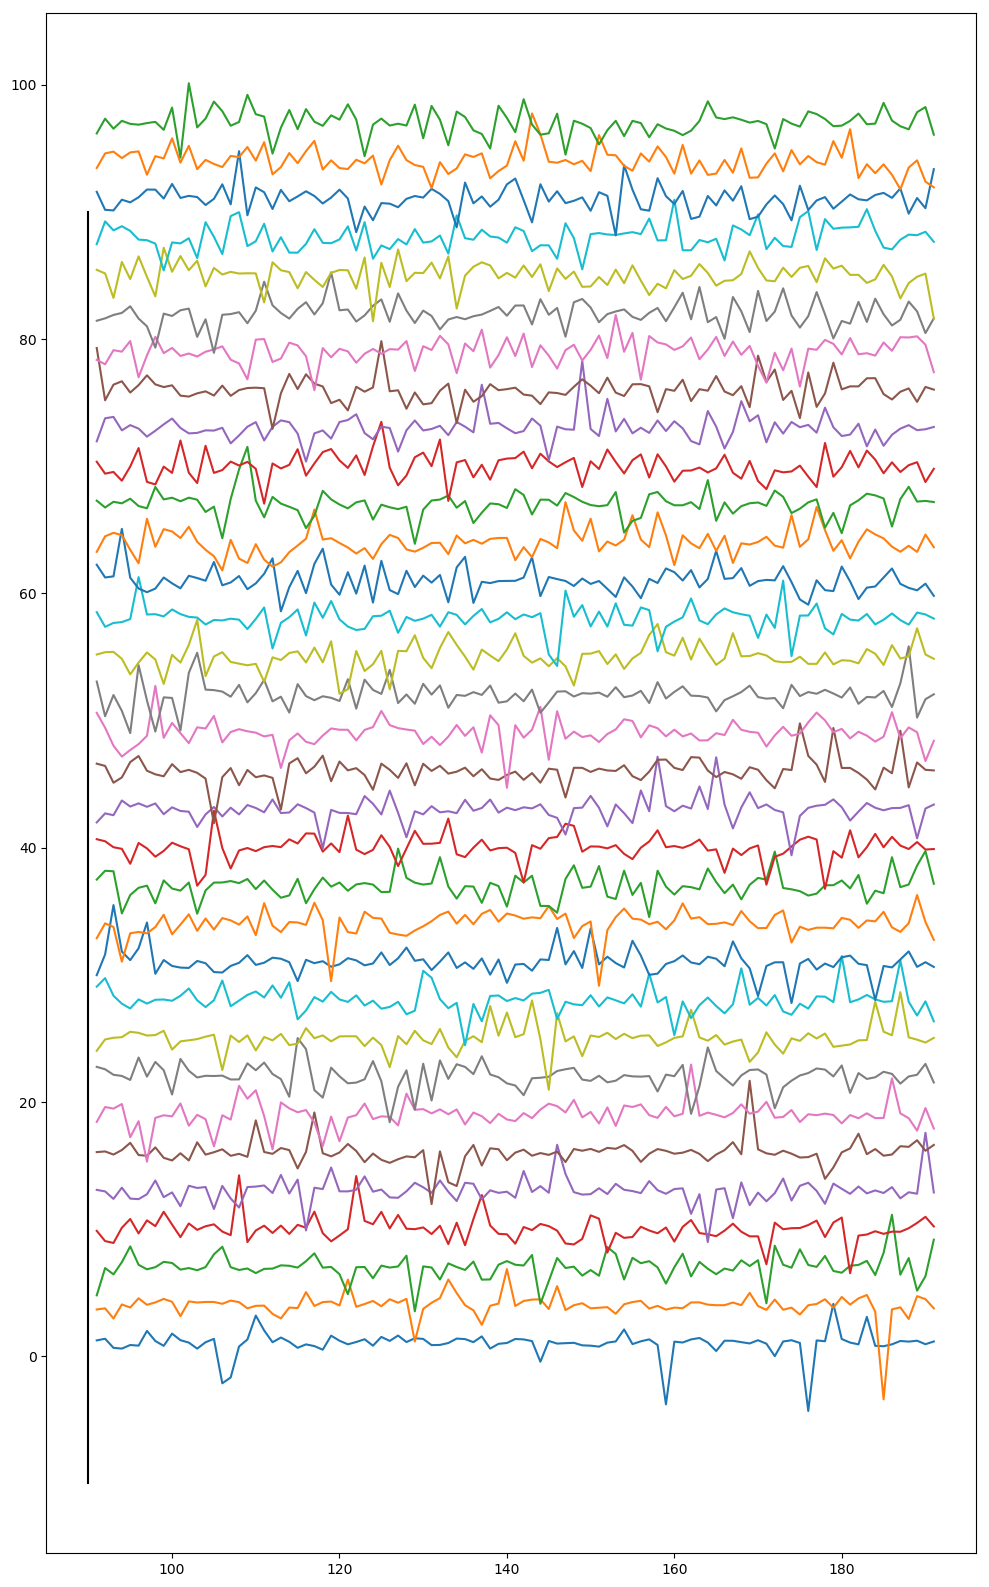

In [81]:
figura=figure(figsize=(12,20))

rango=1:101

plot([90,90],[-10,90], color="black")

for l=1:3:99
    plot(rango+retrazo,heytu[l,rango]+l)
end


In [63]:
datos["retrazo"]

90

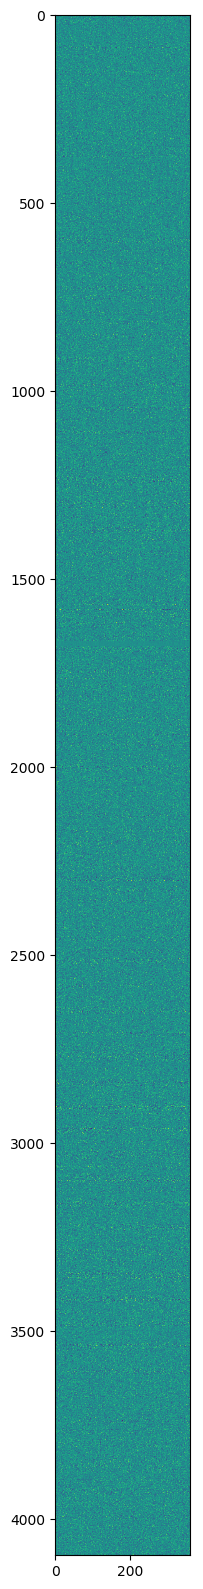

PyObject <matplotlib.image.AxesImage object at 0x7f5b37799f98>

In [77]:
figure(figsize=(3,20))
imshow(tuabuela.W)